In [164]:
import argparse
import pandas as pd
import numpy as np
import os 

from matplotlib import pyplot as plt

In [165]:
input_path = "./out/models_experimet_results.csv"
df = pd.read_csv(input_path)
df

,Unnamed: 0,ins,rep,model,fun,success,nit,nfev,Ta,Tb,Tc,Td
0,0,2023_02_09-00_13_00,0,A1,0.000271,True,128,19350,15.989357,0.911450,6.289556,NaN
1,1,2023_02_13-14_08_10,0,A1,15.997274,True,9,1500,767.054230,794.561305,63.324752,NaN
2,2,2023_01_06-08_45_00,0,A1,0.004543,True,116,17550,703.244025,2.923320,49.061895,NaN
3,3,2023_01_05-00_21_20,0,A1,0.002259,True,66,10050,4.340125,979.769176,163.122672,NaN
4,4,2023_01_13-14_04_00,0,A1,0.011018,True,34,5250,4.184630,289.660305,387.773980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1007,2023_01_04-00_16_30,10,B2,0.001283,True,108,16350,NaN,18.279171,28.955949,8.491825
1008,1008,2023_01_24-09_44_02,10,B2,0.001412,True,40,6150,NaN,299.196081,171.684688,632.970233
1009,1009,2023_01_17-01_31_40,10,B2,0.002160,True,52,7950,NaN,169.630392,59.190767,25.112541
1010,1010,2023_02_07-04_56_30,10,B2,0.014053,True,59,9000,NaN,896.476406,455.971885,87.904827


In [166]:
## Fallos de convergencia
df.loc[df.success == False]
df.loc[df.fun > 1]

,Unnamed: 0,ins,rep,model,fun,success,nit,nfev,Ta,Tb,Tc,Td
1,1,2023_02_13-14_08_10,0,A1,15.997274,True,9,1500,767.054230,794.561305,63.324752,NaN
5,5,2023_02_12-10_41_30,0,A1,469.448733,True,21,3300,721.026214,822.037590,1.093677,NaN
10,10,2023_01_09-04_03_00,0,A1,1.932132,True,14,2250,629.270541,675.151441,0.284190,NaN
24,24,2023_02_13-14_08_10,1,A1,15.997260,True,6,1050,473.690249,643.892325,42.615867,NaN
28,28,2023_02_12-10_41_30,1,A1,469.447742,True,19,3000,806.331852,467.104457,1.101116,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
925,925,2023_02_12-10_41_30,7,B2,61.968457,True,52,7950,NaN,0.145372,999.251806,0.003467
944,944,2023_02_13-14_08_10,8,B2,15.926488,True,10,1650,NaN,3.231459,858.574776,11.196495
948,948,2023_02_12-10_41_30,8,B2,1.571473,True,353,53100,NaN,73.170718,325.094612,540.402331
967,967,2023_02_13-14_08_10,9,B2,15.928341,True,8,1350,NaN,25.578327,583.508554,11.605425


In [168]:
## caso mas malo! INICIO UNO ANTES
df.loc[df.ins == '2023_02_12-10_41_30']

## Segundo caso malo! INICIO UNO DESPUES
df.loc[df.ins == '2023_02_13-14_08_10']

## Tercer caso malo INICIO UNO ANTES
df.loc[df.ins == '2023_01_09-04_03_00']

df_clean = df.loc[~df.ins.isin(['2023_02_13-14_08_10','2023_02_12-10_41_30','2023_01_09-04_03_00'])]


#means = df_clean.groupby(['model','ins']).fun.mean()

#plt.plot(means.A1.index.to_numpy(), means.A1.to_numpy(), label = "A1")
#plt.plot(means.A2.index.to_numpy(), means.A2.to_numpy(), label = "A2")
#plt.plot(means.B1.index.to_numpy(), means.B1.to_numpy(), label = "B1")
#plt.plot(means.B2.index.to_numpy(), means.B2.to_numpy(), label = "B2")

#plt.legend()

print(df_clean.groupby(['model']).fun.mean())
print(df_clean.groupby(['model']).nit.mean())
print(df_clean.groupby(['model']).nfev.mean())



model
A1    0.005406
A2    0.003936
B1    0.006944
B2    0.005146
Name: fun, dtype: float64
model
A1     74.177273
A2    113.209091
B1     49.195455
B2     72.118182
Name: nit, dtype: float64
model
A1    11276.590909
A2    20557.636364
B1     6023.454545
B2    10967.727273
Name: nfev, dtype: float64


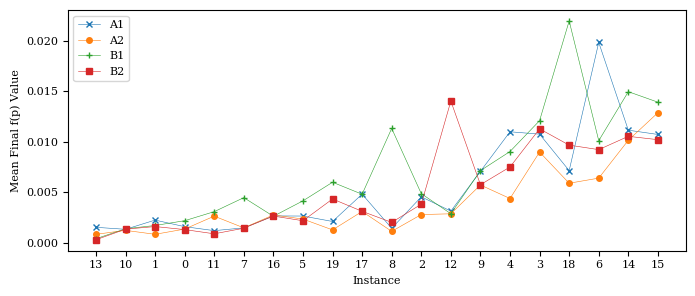

In [161]:
## Fig E2 1

font = {'family' : 'serif',
        'size'   : 8}

plt.rc('font', **font)
fig = plt.figure(figsize=(7,3))

orden = df_clean.groupby(['ins']).fun.mean().to_numpy().argsort()
means = df_clean.groupby(['model','ins']).fun.mean()

plt.plot(orden.astype(str), means.A1.to_numpy()[orden], label = "A1", marker = "x", markersize = 4, linewidth=.4)
plt.plot(orden.astype(str), means.A2.to_numpy()[orden], label = "A2", marker = "o", markersize = 4, linewidth=.4)
plt.plot(orden.astype(str), means.B1.to_numpy()[orden], label = "B1", marker = "+", markersize = 4, linewidth=.4)
plt.plot(orden.astype(str), means.B2.to_numpy()[orden], label = "B2", marker = "s", markersize = 4, linewidth=.4)

plt.legend(loc = 'upper left')

plt.xlabel("Instance")
plt.ylabel("Mean Final f(p) Value")

fig.tight_layout()
plt.savefig(f"./img/ExpMods_FunMean.pdf")

In [125]:
import pickle
from scipy import signal

import sys
sys.path.insert(0, ".")
sys.path.insert(0, "./src/")
import models as mdl

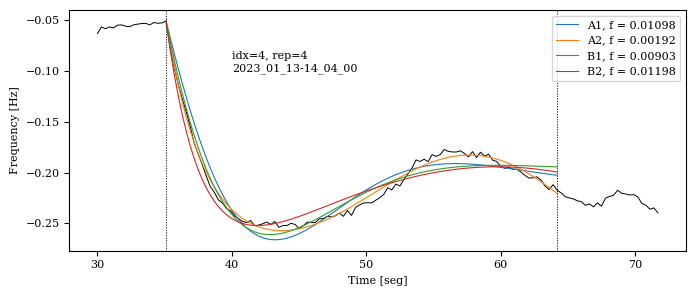

In [160]:
## Fig1 E2 2

font = {'family' : 'serif',
        'size'   : 8}

plt.rc('font', **font)

idx = 4

instance = df_clean.groupby(['ins']).fun.mean().index[idx]
rep = 4


models = ["A1","A2","B1","B2"]

for model in models:
    sam_dir = f"test/test_models_exp_paper/samps"
    out_dir = f"test/test_models_exp_paper/{model}/{instance}/rep{rep}"
        
    file = open(f"{out_dir}/{instance}_sampled_result.p", 'rb')
    result = pickle.load(file)
    file.close()
    x = result.x
    df = pd.read_csv(f"{sam_dir}/{instance}_sampled.csv")  
    Ts = df["time"][1]
    P0 = -df["power"][0] / 1000
    event_freq = df["delta_freq"][df["event"]==1].to_numpy()

    if model == "b":
        sys = mdl.modelo_b(x, Ts)
    elif model == "c":
        sys = mdl.modelo_c(x, Ts)
    elif model == "cc":
        sys = mdl.modelo_cc(x, Ts)
            ########################################
    elif model == "A1":
        sys = mdl.modelo_A1(x, Ts)
    elif model == "A2":
        sys = mdl.modelo_A2(x, Ts)
    elif model == "B1":
        sys = mdl.modelo_B1(x, Ts)
    elif model == "B2":
        sys = mdl.modelo_B2(x, Ts)

    sim_power = P0 * np.repeat(1, event_freq.shape)
    sim = signal.dlsim(sys, sim_power, x0 = event_freq[0])
    sim_freq = sim[1].ravel()

    real_time = df["time"].to_numpy()
    real_freq = df["delta_freq"].to_numpy()

    event_time = df["time"][df["event"]==1].to_numpy()

    sim_time = np.linspace(event_time[0],event_time[-1],num=sim_freq.size)

    if model == "A1":
        fig = plt.figure(figsize=(7,3))
        plt.plot(real_time[100:240], real_freq[100:240], linewidth=.7, color = "k")

        plt.xlabel("Time [seg]")
        plt.ylabel("Frequency [Hz]")


    plt.plot(sim_time,sim_freq, linewidth=.8, label = f"{model}, f = {result.fun.round(5)}")
    plt.axvline(sim_time[-1], alpha=.4, linewidth=.7, color = "k", linestyle='dotted')
    plt.axvline(sim_time[0], alpha=.4, linewidth=.7, color = "k", linestyle='dotted')
    plt.legend(loc = 'upper right')
    
plt.annotate(f"idx={idx}, rep={rep}\n{instance}", xy = (40,-.10))
fig.tight_layout()
plt.savefig(f"./img/ExpMods_idx{idx}_rep{rep}.pdf")